# 1.문제정의
- 머신러닝을 사용해서 어떤 문제를 해결할 것인지
### 목표
- 버섯의 특징을 활용애 독/식용 버섯을 분류
- DecisionTree 시각화&과대적합 속성 제어
- 특성선택(Feature selection) 진행하기

In [71]:
#필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #훈련용/테스트용 분리
from sklearn.metrics import accuracy_score #평가 정확도 측정
from sklearn.tree import DecisionTreeClassifier #결정트리모델

In [72]:
#한글 폰트 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')

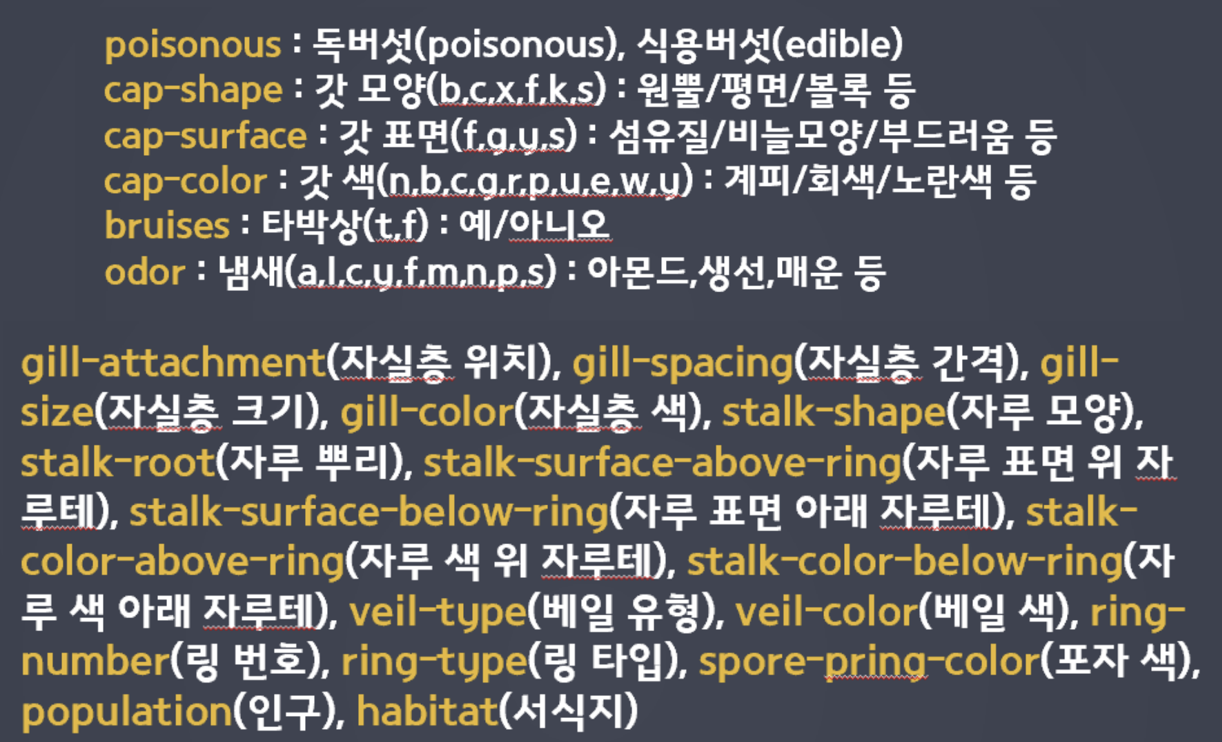

# 2. 데이터 수집
- 정의된 문제를 해결하기 위한 데이터 수집
- 사이트에서 다운로드받기, 크롤링해서 찾기, DB에서 가져오기

In [73]:
#1.데이터 가져오기
mushroom_data=pd.read_csv('./mushroom.csv')
mushroom_data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# 3. 데이터 전처리
- 데이터를 확인해보고 이상치, 결측치 파악 후 수정하기
- 데이터마다 모델링하기 좋은 형태로 변환하기

In [74]:
#데이터 크기 확인
display(mushroom_data.shape)

(8124, 23)

In [75]:
#결측치 여부, 데이터 타입 확인
#결측치 > 삭제 or 채우기
#타입 > 숫자형으로 변환(글자는 안된다)
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [76]:
mushroom_data.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [77]:
#문제데이터(X)/ 답데이터(y) 분리
X=mushroom_data.loc[:,'cap-shape':]
y=mushroom_data['poisonous']

In [78]:
#통계치 확인하기
#평균,분산,4분위수 > 숫자형 값에서 확인 가능
mushroom_data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [79]:
#답 데이터 개수 구하기
#e: 식용
#p: 독
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

### 레이블 인코딩
- 단순 수치 값으로 mapping하는 작업
- 숫자값의 크고 작음에 대한 특성으로 인해 예측 성능이 떨어지는 경우가 발생

In [80]:
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [81]:
#데이터를 연결할 딕셔너리 생성
habitat_dic={
    'u':0, 'g':1, 'm':2, 'd':3, 'p':4, 'w':5, 'l':6
}
habitat_dic

{'u': 0, 'g': 1, 'm': 2, 'd': 3, 'p': 4, 'w': 5, 'l': 6}

In [82]:
X['habitat']=X['habitat'].map(habitat_dic)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_11044\847643595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['habitat']=X['habitat'].map(habitat_dic)


In [83]:
X['habitat']

0       0
1       1
2       2
3       0
4       1
       ..
8119    6
8120    6
8121    6
8122    6
8123    6
Name: habitat, Length: 8124, dtype: int64

### 원핫 인코딩
- 단어를 표현하는 가장 기본적인 표현방법
- 특성을 세부적으로 나눠서 생각할 수 있음
- 필요한 공간이 계속 늘어나 저장공간 측면에서는 비효율적인 방법

In [84]:
#get_dummies() 메소드 활용
X_one_hot=pd.get_dummies(X)
X_one_hot.head()

,habitat,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [85]:
print("원본 특성: \n",list(X.columns))

원본 특성: 
 ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [86]:
print("원핫인코딩 후 특성: \n",list(X_one_hot.columns))

원핫인코딩 후 특성: 
 ['habitat', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-b

In [87]:
X_one_hot

,habitat,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,6,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,6,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8121,6,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,6,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# 5.모델 및 하이퍼 파라미터 튜닝

### 모델링

In [88]:
#훈련용 세트와 평가용 세트로 분리
#X_one_hot, y
X_one_hot_train,X_one_hot_test,y_train,y_test=train_test_split(X_one_hot,y,
                                                               test_size=0.3,random_state=10)

In [89]:
#모델 생성
dtree=DecisionTreeClassifier(max_depth=3)
dtree1=DecisionTreeClassifier()

# 6. 학습

In [90]:
#학습(fit)
dtree.fit(X_one_hot_train,y_train)
dtree1.fit(X_one_hot_train,y_train)

DecisionTreeClassifier()

In [91]:
#예측(predict)
predict_data=dtree.predict(X_one_hot_test)

In [92]:
#평가
accuracy_score(predict_data,y_test)

0.9856439704675964

## 시각화 하기

In [93]:
#Decision Tree 시각화 도구
!pip install graphviz

In [94]:
#graphviz 경로 잡기
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [95]:
#원핫인코딩 변수 : X_one_hot
#DT 변수명 : dtree

In [96]:
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity=False,
               filled=True)

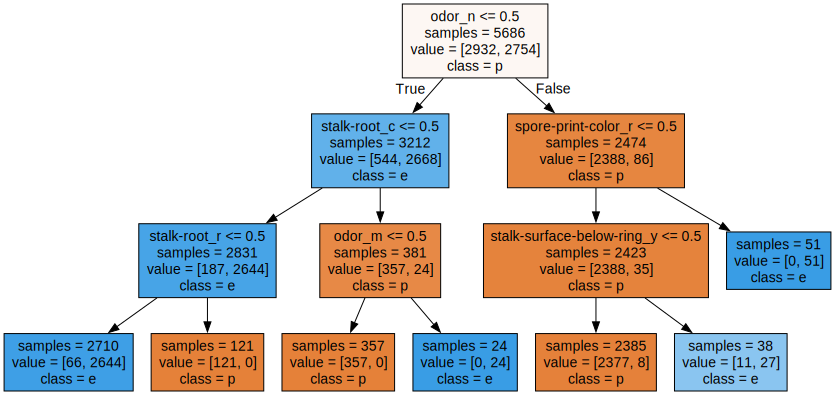

In [97]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [98]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [99]:
from sklearn.tree import export_graphviz
export_graphviz(dtree1, out_file='tree1.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity=False,
               filled=True)

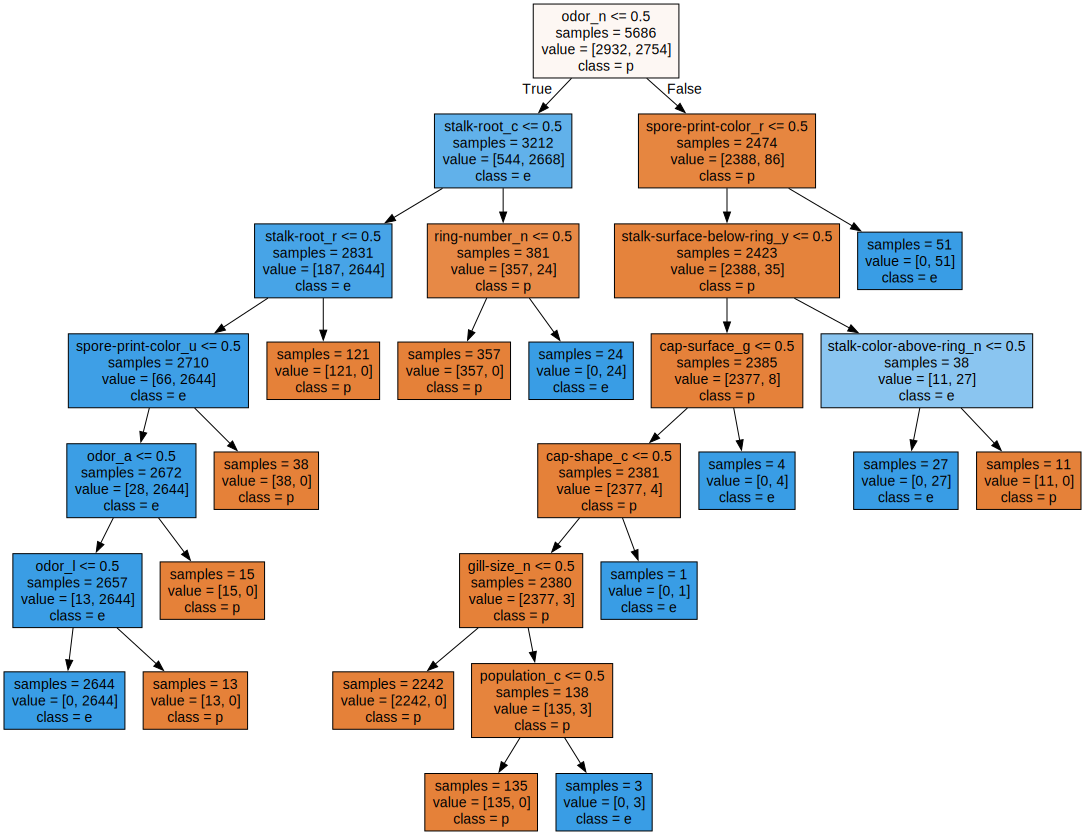

In [100]:
import graphviz

with open('tree1.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [101]:
from subprocess import check_call
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

0

In [102]:
#특성 중요도
#0~1 사이의 숫자로 표현
#1에 가까울수록 중요, 0에 가까울수록 중요하지 않음
#전체 합이 1
fi=dtree1.feature_importances_

In [103]:
#2.80252522e-03 : 부동소수점 표현 방법
#2.80252522 : 무조건 일의 자리 숫자로 표현
#e-03 : 10의 -3제곱
fi

array([0.00000000e+00, 0.00000000e+00, 7.02103219e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.80252522e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.04007607e-02,
       0.00000000e+00, 0.00000000e+00, 9.10945096e-03, 0.00000000e+00,
       6.23355113e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.32614456e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.79373456e-01, 0.00000000e+00,
      

In [104]:
df=pd.DataFrame(fi, index=X_one_hot.columns)
#by=정렬 기준(컬럼 이름을 지정안하면 0부터 붙음)
df.sort_values(by=0,ascending=False)

,0
odor_n,0.623355
stalk-root_c,0.179373
stalk-root_r,0.077639
spore-print-color_r,0.034164
spore-print-color_u,0.025833
...,...
gill-size_b,0.000000
gill-spacing_w,0.000000
gill-spacing_c,0.000000
gill-attachment_f,0.000000


# 교차검증
- 고정된 데이터로 학습을 계속 하다보면 train뿐만 아니라 test에도 과대적합이 생김
- 이런 현상을 방지하기 위한 방법
- 데이터를 바꿔가며 학습/평가를 반복한다 > 여러번 결과를 보기 때문에 결과에 신뢰가 높음

In [ ]:
#학습데이터/검증데이터/평가데이터로 3분할
# 5 :  3 :  2 정도 비율로 구성

In [ ]:
# K-fold cross-validation 방법
#1. 데이터 세트를 k개로 나눈다
#2. 첫번째 세트를 제외하고 나머지에 대해 모델을 학습, 첫번째 세트를 이용 평가 수행
#3. 2번 과정을 마지막 세트까지 반복
#4. 각 세트에 대해 구했던 평가 결과의 평균을 구한다

In [106]:
from sklearn.model_selection import cross_val_score
#사용할 모델, 문제데이터, 정답데이터, cv= 데이터 분할 수(주로 5 사용, train:test=4:1)
score = cross_val_score(dtree, X_one_hot_train,y_train, cv=5)

In [107]:
dtree.score(X_one_hot_train,y_train)

0.9850510024621878

In [108]:
dtree.score(X_one_hot_test,y_test)

0.9856439704675964

In [109]:
#train과 test를 바꿔가며 5번 학습한 결과
score

array([0.98330404, 0.98944591, 0.98240985, 0.98504837, 0.98504837])

In [110]:
#사용할 모델, 문제데이터, 정답데이터, cv= 데이터 분할 수(주로 5 사용, train:test=4:1)
score = cross_val_score(dtree1, X_one_hot_train,y_train, cv=5)

In [111]:
dtree1.score(X_one_hot_train,y_train)

1.0

In [112]:
dtree1.score(X_one_hot_test,y_test)

1.0

In [113]:
score

array([1., 1., 1., 1., 1.])